In [1]:
#HI I AM MEER 

import pandas as pd

# Load the dataset
data = pd.read_csv("Credit Card Customer Data.csv")

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


In [2]:
# Display the first few rows of the dataset
print("\nFirst 5 Rows of Data:")
print(data.head())




First 5 Rows of Data:
   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [3]:
# Drop unnecessary columns (if applicable)
# For K-Means clustering, we can remove non-numeric or irrelevant columns.
data_cleaned = data.drop(columns=['Sl_No', 'Customer Key'])

# Check for missing values
print("\nMissing Values:")
print(data_cleaned.isnull().sum())




Missing Values:
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [4]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Display the scaled data
print("\nScaled Data (First 5 Rows):")
print(data_scaled[:5])



Scaled Data (First 5 Rows):
[[ 1.74018685 -1.24922476 -0.86045063 -0.54748969 -1.25153737]
 [ 0.41029254 -0.78758515 -1.47373077  2.5205186   1.89185881]
 [ 0.41029254  1.05897329 -0.86045063  0.13428993  0.1455276 ]
 [-0.12166518  0.13569407 -0.86045063 -0.54748969  0.1455276 ]
 [ 1.74018685  0.59733368 -1.47373077  3.20229822 -0.20373864]]


In [5]:
print("Missing Values (Before Handling):")
print(data.isnull().sum())

Missing Values (Before Handling):
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index([], dtype='object')


In [9]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)

# Display the unique values for each categorical column (if any)
if len(categorical_columns) > 0:
    for col in categorical_columns:
        print(f"\nUnique values in '{col}':")
        print(data[col].unique())
else:
    print("\nNo categorical columns found.")


Categorical Columns:
Index([], dtype='object')

No categorical columns found.


In [ ]:
#so we have not any categorical column

In [10]:
# Generate summary statistics
summary_stats = data.describe(include='all')

# Display the summary statistics
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
            Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000    327.589394      34574.242424            4.706061   
std    190.669872    189.348110      37625.487804            2.167835   
min      1.000000      0.000000       3000.000000            1.000000   
25%    165.750000    164.750000      10000.000000            3.000000   
50%    330.500000    326.500000      18000.000000            5.000000   
75%    495.250000    491.250000      48000.000000            6.000000   
max    660.000000    654.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.0

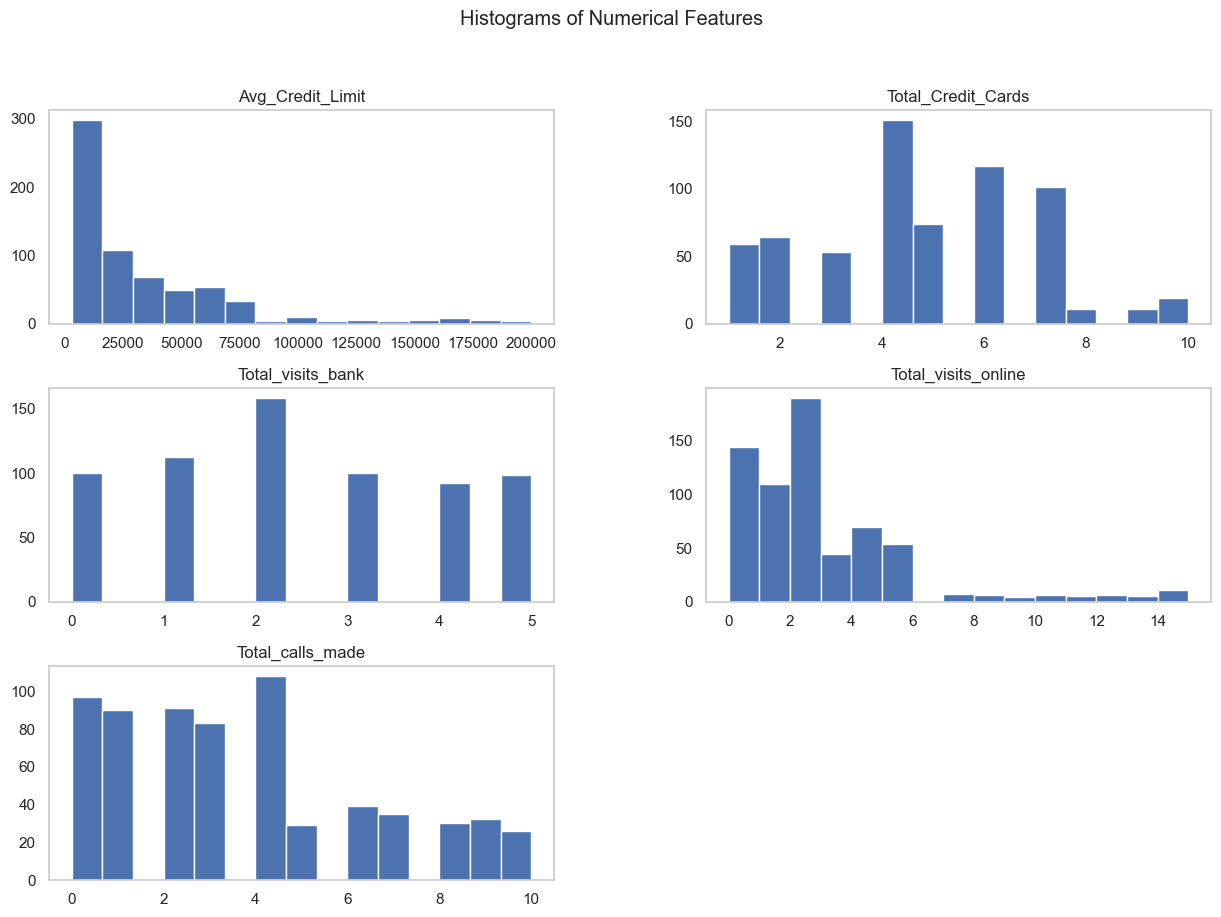

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop irrelevant columns
data_cleaned = data.drop(columns=['Sl_No', 'Customer Key'])

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Histogram for each numerical feature
data_cleaned.hist(bins=15, figsize=(15, 10), grid=False)
plt.suptitle('Histograms of Numerical Features')
plt.show()




C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

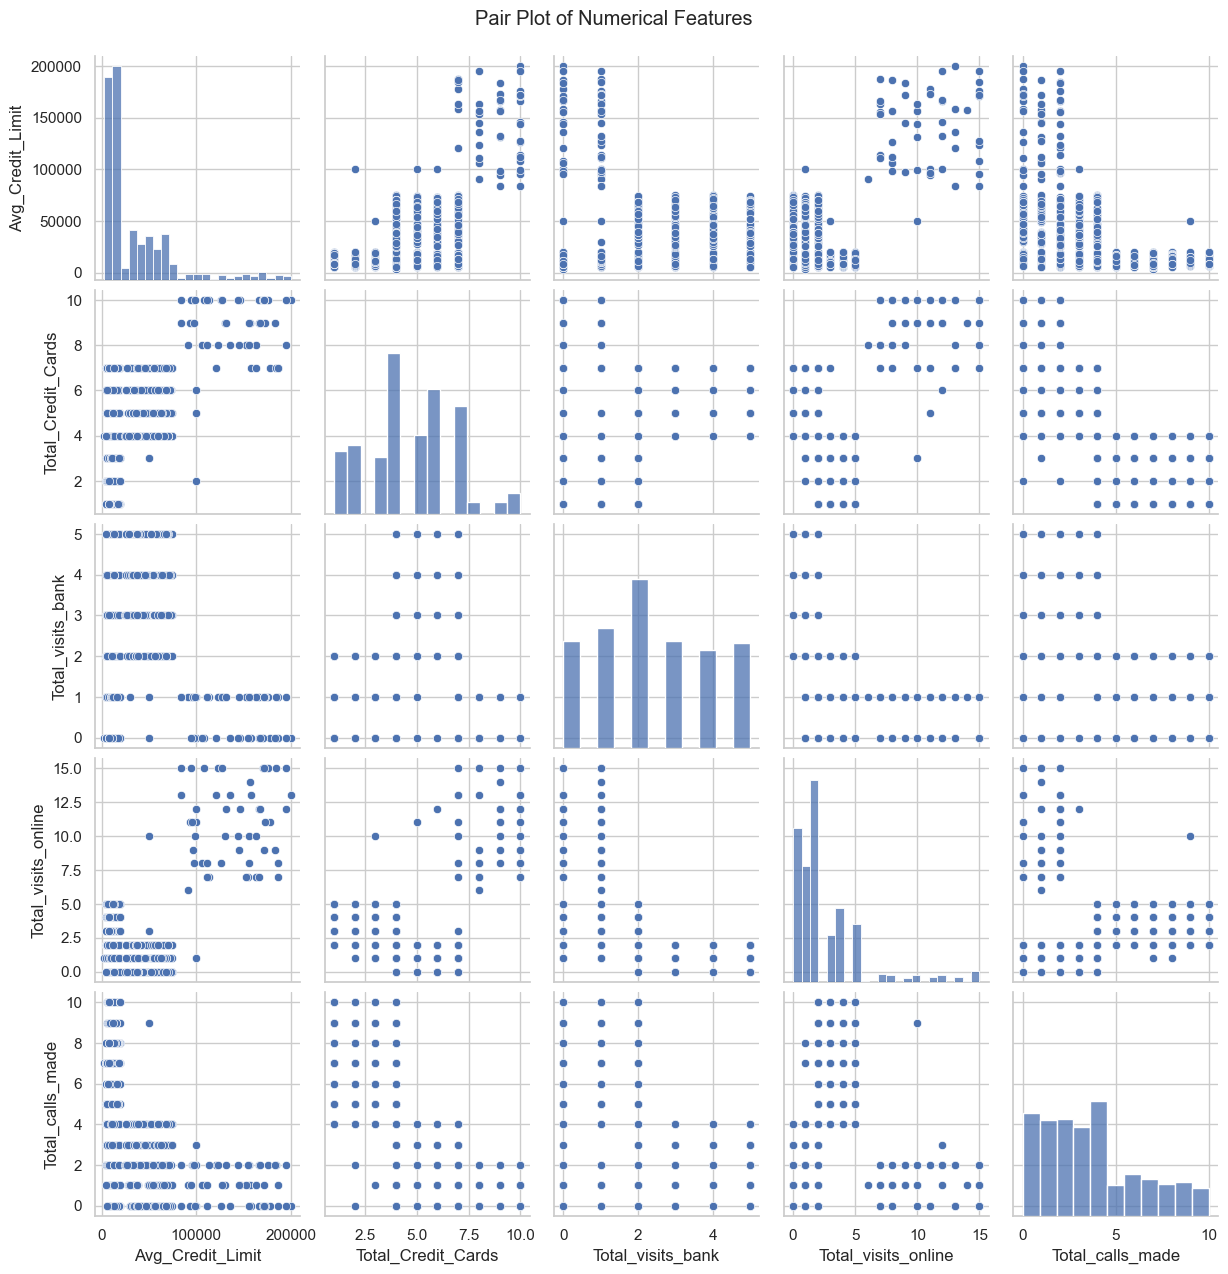

In [13]:
# 2. Pair plot to visualize pairwise relationships between features
sns.pairplot(data_cleaned)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()



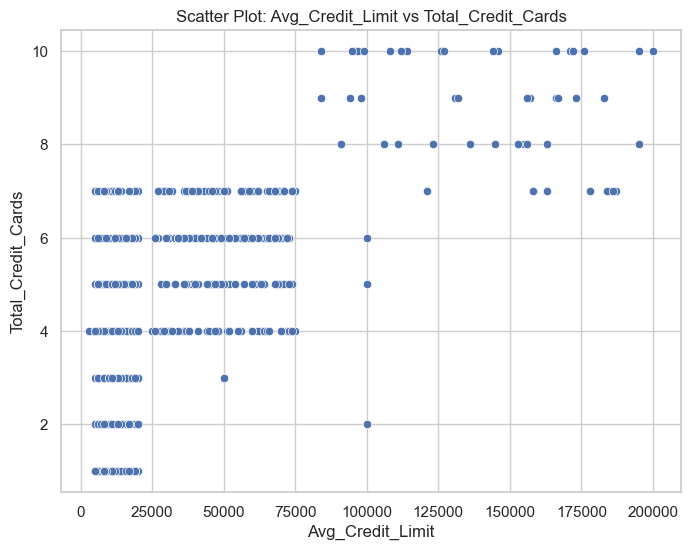

In [14]:
# 3. Scatter Plot to explore relationships between two specific features (e.g., Avg_Credit_Limit vs. Total_Credit_Cards)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Credit_Limit', y='Total_Credit_Cards', data=data_cleaned)
plt.title('Scatter Plot: Avg_Credit_Limit vs Total_Credit_Cards')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.show()

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

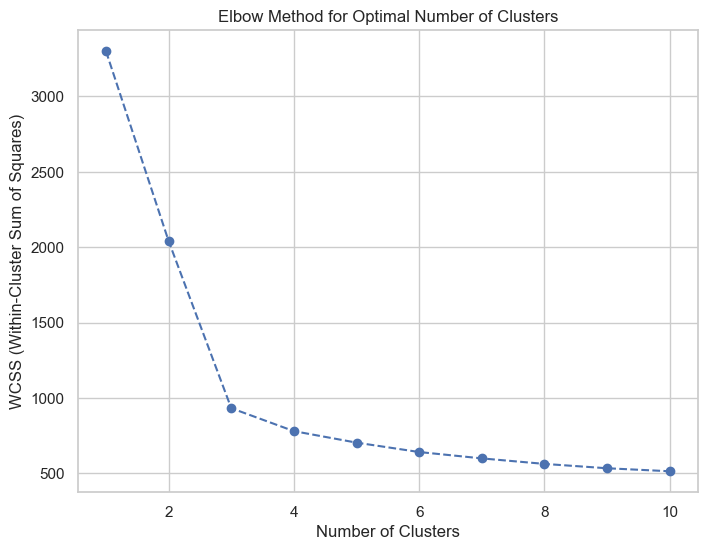

C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



First 5 Rows with Cluster Labels:
   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1           556            100000                   2   
1      2           208             50000                   3   
2      3            47             50000                   7   
3      4           220             30000                   5   
4      5           269            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  Cluster  
0                  1                    1                 0        0  
1                  0                   10                 9        1  
2                  1                    3                 4        0  
3                  1                    1                 4        0  
4                  0                   12                 3        2  


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the elbow plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3

# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print("\nFirst 5 Rows with Cluster Labels:")
print(data.head())


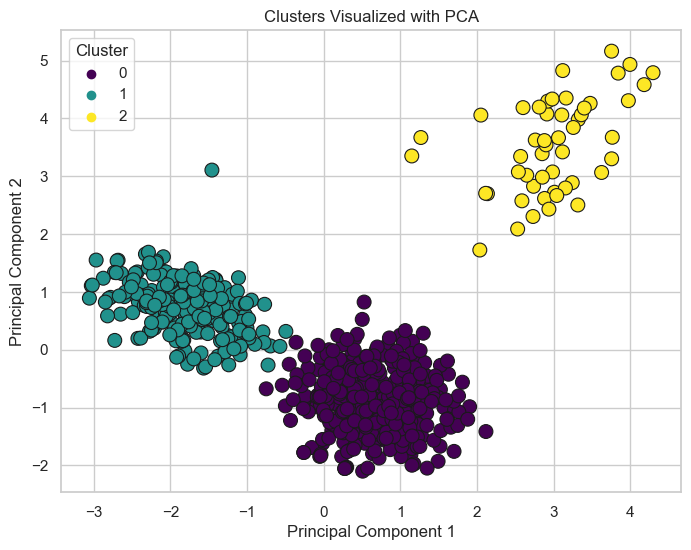


Cluster Analysis (Mean Values for Each Feature):
              Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
Cluster                                                                   
0        417.528497    325.406736      33782.383420            5.515544   
1        117.857143    328.821429      12174.107143            2.410714   
2        611.280000    338.920000     141040.000000            8.740000   

         Total_visits_bank  Total_visits_online  Total_calls_made  
Cluster                                                            
0                 3.489637             0.981865          2.000000  
1                 0.933036             3.553571          6.870536  
2                 0.600000            10.900000          1.080000  


In [17]:
from sklearn.decomposition import PCA
# Dimensionality reduction using PCA to visualize clusters (reduce to 2 components)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100, edgecolor='k')
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze and describe the characteristics of each cluster
# Group the data by clusters and compute the mean for each feature
cluster_analysis = data.groupby('Cluster').mean()

print("\nCluster Analysis (Mean Values for Each Feature):")
print(cluster_analysis)
